# Women's Model

This notebook makes the machine learning model. Remember to uncomment the last cell if you wouldlike to save the model. 

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df_mod = pd.read_csv(r'..\data\preprocessed\womens_model_data\womens_model_data.csv')

df_mod

,Season,Result,Team A ID,Team A,Team B ID,Team B,Round,Seed,Head to Head,Common Opps,Past Year Tournament Result,Past 4 Years Tournament Results,Rating,Efficiency Margin,Adjusted Offense,Adjusted Defense,Adjusted Tempo,Past Year Rating,Past 4 Years Ratings,Starters,Team Win%,Team EFG%,Opponent EFG%,Team TOR,Opponent TOR,Team ORBR,Team FTR,Opponent FTR,0.5 Win,0.75 Win,0.9 Win,1.0 Win,0.0 Loss,0.1 Loss,0.25 Loss,0.5 Loss,Team A Offense Team B Defense,Team B Offense Team A Defense,Team A Rating,Team B Rating
0,2012,1,3116,Arkansas,3173,Dayton,1,-5,NaN,0.000000,-1.0,-0.750000,-0.089508,0.026757,0.001189,-0.025567,-8.387438,-0.551002,-0.663068,-0.147548,-0.051168,-0.013769,-0.005223,-0.255442,2.215458,2.440872,-1.447517,-2.717337,0.049103,0.057933,0.080154,0.186366,-0.098768,-0.004212,0.068672,0.031637,1.730252,1.703495,2.321899,2.411407
1,2012,1,3163,Connecticut,3341,Prairie View,1,-15,NaN,0.666667,4.0,2.750000,5.420883,0.688562,0.339859,-0.348703,0.854502,4.666967,5.646929,0.945633,0.362659,0.114824,-0.103051,-2.108403,1.200900,2.702770,-0.994398,-5.867203,0.325851,0.377205,0.371813,0.551623,0.447986,0.516449,0.609848,0.568292,2.092237,1.403675,4.755495,-0.665388
2,2012,1,3177,DePaul,3140,BYU,1,-3,NaN,-0.153846,3.0,1.000000,0.263877,0.023684,0.068715,0.045031,2.795567,1.327217,1.278952,0.001981,-0.118952,0.002505,0.059121,0.348861,1.341508,-1.196064,-2.637275,-1.103772,0.065701,0.045488,0.088543,0.067362,0.158003,0.159586,0.152590,0.111489,1.830027,1.806343,2.604955,2.341077
3,2012,1,3211,Gonzaga,3353,Rutgers,1,5,NaN,NaN,2.0,1.000000,-0.217967,-0.047588,0.052572,0.100160,5.078021,0.741975,-0.351774,-0.057039,0.129032,0.046226,0.050877,-3.790769,-1.060401,1.929341,-0.756823,-4.345191,-0.121741,-0.121117,-0.068439,-0.019417,-0.172513,-0.130744,-0.066982,-0.129448,1.740460,1.788048,2.460832,2.678799
4,2012,1,3243,Kansas St,3343,Princeton,1,-1,NaN,-0.307692,0.0,-0.250000,-0.452299,-0.061093,-0.048631,0.012462,-7.006088,-0.186343,1.565799,-0.117382,-0.263393,-0.042403,0.027494,-1.713529,-2.541942,-5.754640,-4.428173,2.920438,0.249388,0.195220,0.105794,0.142998,0.091003,0.024551,0.045774,-0.025010,1.666190,1.727284,2.081415,2.533715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2023,-1,3268,Maryland,3376,South Carolina,4,1,-0.8,0.000000,-4.0,-2.333333,-2.297466,-0.255286,-0.102635,0.152651,3.881919,-2.546332,-0.770498,-0.277584,-0.193548,-0.013409,0.129295,0.102629,6.190148,-9.255655,-1.139981,1.043045,0.006993,-0.011435,0.016908,-0.002886,-0.399127,-0.372879,-0.310015,-0.200165,1.739039,1.994326,3.815571,6.113037
1382,2023,-1,3326,Ohio St,3439,Virginia Tech,4,2,NaN,0.000000,2.0,0.000000,-0.503128,-0.053538,-0.040638,0.012900,7.036740,0.042043,-0.186680,-0.183432,-0.089718,0.002137,0.056640,-0.951253,4.935148,-1.456589,-1.964807,1.444126,-0.087140,-0.010175,-0.005974,0.065653,0.036137,0.090983,0.116520,0.096686,1.871238,1.924775,3.614788,4.117916
1383,2023,-1,3376,South Carolina,3234,Iowa,5,-1,NaN,0.592593,5.0,2.000000,2.073065,0.200165,0.015299,-0.184866,-4.516919,2.531813,1.369934,0.225738,0.187500,-0.074863,-0.107958,-0.624248,0.320985,12.831391,-1.071930,-3.378402,0.012387,0.006406,-0.000341,0.020598,0.411789,0.384592,0.337157,0.265864,2.026540,1.826376,6.113037,4.039972
1384,2023,-1,3439,Virginia Tech,3261,LSU,5,-2,NaN,0.153846,-1.0,0.333333,-0.377149,-0.055700,-0.018698,0.037002,-5.960647,-0.325898,0.360466,-0.096830,-0.062366,0.009444,0.016518,-0.528286,-2.999539,-7.044113,-4.320422,0.524095,0.108699,0.067741,0.053432,0.025771,-0.146194,-0.158831,-0.177786,-0.167504,1.874874,1.930573,4.117916,4.495065


In [2]:
df_mod.isna().mean()

Season                             0.000000
Result                             0.000000
Team A ID                          0.000000
Team A                             0.000000
Team B ID                          0.000000
Team B                             0.000000
Round                              0.000000
Seed                               0.000000
Head to Head                       0.858586
Common Opps                        0.238095
Past Year Tournament Result        0.090909
Past 4 Years Tournament Results    0.000000
Rating                             0.000000
Efficiency Margin                  0.000000
Adjusted Offense                   0.000000
Adjusted Defense                   0.000000
Adjusted Tempo                     0.000000
Past Year Rating                   0.002886
Past 4 Years Ratings               0.002886
Starters                           0.000000
Team Win%                          0.000000
Team EFG%                          0.000000
Opponent EFG%                   

In [3]:
# df_mod.drop(columns=['Opponent TOR'], inplace=True)  # low correlation

# df_mod

,Season,Result,Team A ID,Team A,Team B ID,Team B,Round,Seed,Head to Head,Common Opps,Past Year Tournament Result,Past 4 Years Tournament Results,Rating,Efficiency Margin,Adjusted Offense,Adjusted Defense,Adjusted Tempo,Past Year Rating,Past 4 Years Ratings,Starters,Team Win%,Team EFG%,Opponent EFG%,Team TOR,Team ORBR,Team FTR,Opponent FTR,0.5 Win,0.75 Win,0.9 Win,1.0 Win,0.0 Loss,0.1 Loss,0.25 Loss,0.5 Loss,Team A Offense Team B Defense,Team B Offense Team A Defense,Team A Rating,Team B Rating
0,2012,1,3116,Arkansas,3173,Dayton,1,-5,NaN,0.000000,-1.0,-0.750000,-0.089508,0.026757,0.001189,-0.025567,-8.387438,-0.551002,-0.663068,-0.147548,-0.051168,-0.013769,-0.005223,-0.255442,2.440872,-1.447517,-2.717337,0.049103,0.057933,0.080154,0.186366,-0.098768,-0.004212,0.068672,0.031637,1.730252,1.703495,2.321899,2.411407
1,2012,1,3163,Connecticut,3341,Prairie View,1,-15,NaN,0.666667,4.0,2.750000,5.420883,0.688562,0.339859,-0.348703,0.854502,4.666967,5.646929,0.945633,0.362659,0.114824,-0.103051,-2.108403,2.702770,-0.994398,-5.867203,0.325851,0.377205,0.371813,0.551623,0.447986,0.516449,0.609848,0.568292,2.092237,1.403675,4.755495,-0.665388
2,2012,1,3177,DePaul,3140,BYU,1,-3,NaN,-0.153846,3.0,1.000000,0.263877,0.023684,0.068715,0.045031,2.795567,1.327217,1.278952,0.001981,-0.118952,0.002505,0.059121,0.348861,-1.196064,-2.637275,-1.103772,0.065701,0.045488,0.088543,0.067362,0.158003,0.159586,0.152590,0.111489,1.830027,1.806343,2.604955,2.341077
3,2012,1,3211,Gonzaga,3353,Rutgers,1,5,NaN,NaN,2.0,1.000000,-0.217967,-0.047588,0.052572,0.100160,5.078021,0.741975,-0.351774,-0.057039,0.129032,0.046226,0.050877,-3.790769,1.929341,-0.756823,-4.345191,-0.121741,-0.121117,-0.068439,-0.019417,-0.172513,-0.130744,-0.066982,-0.129448,1.740460,1.788048,2.460832,2.678799
4,2012,1,3243,Kansas St,3343,Princeton,1,-1,NaN,-0.307692,0.0,-0.250000,-0.452299,-0.061093,-0.048631,0.012462,-7.006088,-0.186343,1.565799,-0.117382,-0.263393,-0.042403,0.027494,-1.713529,-5.754640,-4.428173,2.920438,0.249388,0.195220,0.105794,0.142998,0.091003,0.024551,0.045774,-0.025010,1.666190,1.727284,2.081415,2.533715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,2023,-1,3268,Maryland,3376,South Carolina,4,1,-0.8,0.000000,-4.0,-2.333333,-2.297466,-0.255286,-0.102635,0.152651,3.881919,-2.546332,-0.770498,-0.277584,-0.193548,-0.013409,0.129295,0.102629,-9.255655,-1.139981,1.043045,0.006993,-0.011435,0.016908,-0.002886,-0.399127,-0.372879,-0.310015,-0.200165,1.739039,1.994326,3.815571,6.113037
1382,2023,-1,3326,Ohio St,3439,Virginia Tech,4,2,NaN,0.000000,2.0,0.000000,-0.503128,-0.053538,-0.040638,0.012900,7.036740,0.042043,-0.186680,-0.183432,-0.089718,0.002137,0.056640,-0.951253,-1.456589,-1.964807,1.444126,-0.087140,-0.010175,-0.005974,0.065653,0.036137,0.090983,0.116520,0.096686,1.871238,1.924775,3.614788,4.117916
1383,2023,-1,3376,South Carolina,3234,Iowa,5,-1,NaN,0.592593,5.0,2.000000,2.073065,0.200165,0.015299,-0.184866,-4.516919,2.531813,1.369934,0.225738,0.187500,-0.074863,-0.107958,-0.624248,12.831391,-1.071930,-3.378402,0.012387,0.006406,-0.000341,0.020598,0.411789,0.384592,0.337157,0.265864,2.026540,1.826376,6.113037,4.039972
1384,2023,-1,3439,Virginia Tech,3261,LSU,5,-2,NaN,0.153846,-1.0,0.333333,-0.377149,-0.055700,-0.018698,0.037002,-5.960647,-0.325898,0.360466,-0.096830,-0.062366,0.009444,0.016518,-0.528286,-7.044113,-4.320422,0.524095,0.108699,0.067741,0.053432,0.025771,-0.146194,-0.158831,-0.177786,-0.167504,1.874874,1.930573,4.117916,4.495065


Get monotonic constraints

In [4]:
correlations = df_mod.corr()['Result']

correlations.round(2)

Season                            -0.00
Result                             1.00
Team A ID                          0.00
Team B ID                         -0.00
Round                              0.00
Seed                              -0.62
Head to Head                       0.80
Common Opps                        0.37
Past Year Tournament Result        0.52
Past 4 Years Tournament Results    0.51
Rating                             0.60
Efficiency Margin                  0.63
Adjusted Offense                   0.58
Adjusted Defense                  -0.56
Adjusted Tempo                     0.16
Past Year Rating                   0.58
Past 4 Years Ratings               0.57
Starters                           0.57
Team Win%                          0.38
Team EFG%                          0.37
Opponent EFG%                     -0.24
Team TOR                          -0.19
Team ORBR                          0.17
Team FTR                           0.05
Opponent FTR                      -0.29


In [5]:
correlations.loc[correlations.abs() < 0.04].round(2)

Season      -0.0
Team A ID    0.0
Team B ID   -0.0
Round        0.0
Name: Result, dtype: float64

In [6]:
monotone_constraints = dict(zip(
    df_mod.drop(columns=['Team A', 'Team B']).columns[correlations > 0.04], 
    [1 for _ in range((correlations > 0.04).sum())]
))

monotone_constraints.update(dict(zip(
    df_mod.drop(columns=['Team A', 'Team B']).columns[correlations < -0.04], 
    [-1 for _ in range((correlations < -0.04).sum())]
)))

del monotone_constraints['Result']

monotone_constraints.pop('Adjusted Tempo', None)  # tempo should be bidirectional  imo

monotone_constraints

{'Head to Head': 1,
 'Common Opps': 1,
 'Past Year Tournament Result': 1,
 'Past 4 Years Tournament Results': 1,
 'Rating': 1,
 'Efficiency Margin': 1,
 'Adjusted Offense': 1,
 'Past Year Rating': 1,
 'Past 4 Years Ratings': 1,
 'Starters': 1,
 'Team Win%': 1,
 'Team EFG%': 1,
 'Team ORBR': 1,
 'Team FTR': 1,
 '0.5 Win': 1,
 '0.75 Win': 1,
 '0.9 Win': 1,
 '1.0 Win': 1,
 '0.0 Loss': 1,
 '0.1 Loss': 1,
 '0.25 Loss': 1,
 '0.5 Loss': 1,
 'Team A Offense Team B Defense': 1,
 'Team A Rating': 1,
 'Seed': -1,
 'Adjusted Defense': -1,
 'Opponent EFG%': -1,
 'Team TOR': -1,
 'Opponent FTR': -1,
 'Team B Offense Team A Defense': -1,
 'Team B Rating': -1}

Create train-val-test folds

In [7]:
from sklearn.model_selection import GroupKFold
import numpy as np

np.random.seed(22)

gkf = GroupKFold(n_splits=3)

cv_data = []
for train_val_index, test_index in gkf.split(df_mod.index, groups=df_mod['Season']):
    df_train_val_iter = df_mod.loc[train_val_index, :]
    df_test_iter = df_mod.loc[test_index, :]

    val_seasons = np.random.choice(df_train_val_iter['Season'].unique(), size=3, replace=False)

    X_train_iter = (
        df_train_val_iter
        .loc[~df_train_val_iter['Season'].isin(val_seasons), :]
        .drop(columns=['Season', 'Result', 'Team A ID', 'Team A', 'Team B ID', 'Team B'])
    )
    X_val_iter = (
        df_train_val_iter
        .loc[df_train_val_iter['Season'].isin(val_seasons), :]
        .drop(columns=['Season', 'Result', 'Team A ID', 'Team A', 'Team B ID', 'Team B'])
    )
    X_test_iter = (
        df_test_iter
        .drop(columns=['Season', 'Result', 'Team A ID', 'Team A', 'Team B ID', 'Team B'])
    )

    y_train_iter = (
        df_train_val_iter
        .loc[~df_train_val_iter['Season'].isin(val_seasons), 'Result']
    )
    y_val_iter = (
        df_train_val_iter
        .loc[df_train_val_iter['Season'].isin(val_seasons), 'Result']
    )
    y_test_iter = (
        df_test_iter['Result']
    )

    cv_data.append((
        X_train_iter, 
        X_val_iter, 
        X_test_iter, 
        y_train_iter, 
        y_val_iter, 
        y_test_iter
    ))

len(cv_data)

3

In [8]:
from sklearn.metrics import log_loss
from xgboost import XGBClassifier
import optuna
import warnings

warnings.filterwarnings('ignore')  # xgboost gives way too many warnings

def objective(trial, cv_data=cv_data):
    # model tuning
    params = {
        'random_state': 22,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'n_estimators': 1_000,
        'eta': trial.suggest_float('eta', 0.005, 0.100),
        'max_depth': trial.suggest_int('max_depth', 4, 16),
        'lambda': trial.suggest_float('lambda', 1e-8, 5.0),
        'alpha': trial.suggest_float('alpha', 1e-8, 5.0),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 5.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.30),
    }    
    mod = XGBClassifier(**params, monotone_constraints=monotone_constraints)

    # cross validation
    y_actuals = []
    y_preds = []
    for X_train, X_val, X_test, y_train, y_val, y_test in cv_data:
        y_actuals.append(y_test)

        mod.fit(
            X_train, 
            y_train, 
            eval_metric='logloss',
            eval_set=((X_val, y_val), ),
            early_stopping_rounds=25,
            verbose=False,
            # sample_weight=weights,
        )

        y_preds.append(mod.predict_proba(X_test)[:, 1])

    return log_loss(np.hstack(y_actuals), np.hstack(y_preds))

study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=22))
study.optimize(objective, n_trials=250, show_progress_bar=True)

warnings.resetwarnings()

study.best_params

c:\Users\mhugh\anaconda3\envs\clean\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
[I 2024-03-16 17:57:27,866] A new study created in memory with name: no-name-6a7e9127-6adb-425f-8cf4-f2cca2d7080e


  0%|          | 0/250 [00:00<?, ?it/s]

[I 2024-03-16 17:57:29,539] Trial 0 finished with value: 0.43743690444239847 and parameters: {'eta': 0.02480375104909005, 'max_depth': 10, 'lambda': 2.1026901823664934, 'alpha': 4.295909994014901, 'min_child_weight': 0.855807776346751, 'colsample_bytree': 0.1082705485750731}. Best is trial 0 with value: 0.43743690444239847.
[I 2024-03-16 17:57:30,699] Trial 1 finished with value: 0.4366112972836818 and parameters: {'eta': 0.030700619163293964, 'max_depth': 12, 'lambda': 1.102022590984583, 'alpha': 4.059754604573924, 'min_child_weight': 0.05263438147527344, 'colsample_bytree': 0.1727490720322699}. Best is trial 1 with value: 0.4366112972836818.
[I 2024-03-16 17:57:31,162] Trial 2 finished with value: 0.4353585907299754 and parameters: {'eta': 0.08230398780444366, 'max_depth': 13, 'lambda': 0.9455567844116965, 'alpha': 0.03070434166908248, 'min_child_weight': 3.8602193595022425, 'colsample_bytree': 0.2877713287470498}. Best is trial 2 with value: 0.4353585907299754.
[I 2024-03-16 17:57:3

{'eta': 0.010757573288552503,
 'max_depth': 15,
 'lambda': 1.726453598996863,
 'alpha': 0.14137785435818806,
 'min_child_weight': 1.6010508584543217,
 'colsample_bytree': 0.024349339363753667}

In [9]:
optuna.importance.get_param_importances(study)

{'colsample_bytree': 0.46319596020872617,
 'alpha': 0.2271913861637399,
 'eta': 0.10240517622268626,
 'min_child_weight': 0.07491959422940836,
 'lambda': 0.0747375121951317,
 'max_depth': 0.057550370980307644}

In [10]:
np.random.seed(22)

val_seasons = np.random.choice(df_train_val_iter['Season'].unique(), size=3, replace=False)

X_train = (
    df_mod
    .loc[~df_mod['Season'].isin(val_seasons), :]
    .drop(columns=['Season', 'Result', 'Team A ID', 'Team A', 'Team B ID', 'Team B'])
)

X_val = (
    df_mod
    .loc[df_mod['Season'].isin(val_seasons), :]
    .drop(columns=['Season', 'Result', 'Team A ID', 'Team A', 'Team B ID', 'Team B'])
)

y_train = (
    df_mod
    .loc[~df_mod['Season'].isin(val_seasons), 'Result']
)

y_val = (
    df_mod
    .loc[df_mod['Season'].isin(val_seasons), 'Result']
)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((1008, 33), (378, 33), (1008,), (378,))

In [11]:
mod = XGBClassifier(
    **study.best_params, 
    random_state=22,
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=1_000,
    monotone_constraints=monotone_constraints,
)

mod

XGBClassifier(alpha=0.14137785435818806, base_score=None, booster=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.024349339363753667, enable_categorical=False,
              eta=0.010757573288552503, eval_metric='logloss', gamma=None,
              gpu_id=None, importance_type=None, interaction_constraints=None,
              lambda=1.726453598996863, learning_rate=None, max_delta...
                                    'Rating': 1, 'Seed': -1, 'Starters': 1,
                                    'Team A Offense Team B Defense': 1,
                                    'Team A Rating': 1,
                                    'Team B Offense Team A Defense': -1,
                                    'Team B Rating': -1, 'Team EFG%': 1,
                                    'Team FTR': 1, 'Team ORBR': 1,
                                    'Team TOR': -1, ...},
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              pr

In [12]:
mod.fit(
    X_train, 
    y_train, 
    eval_metric='logloss',
    eval_set=((X_val, y_val), ),
    early_stopping_rounds=25,
    verbose=True,
)

[0]	validation_0-logloss:0.69255
[1]	validation_0-logloss:0.68948
[2]	validation_0-logloss:0.68924
[3]	validation_0-logloss:0.68584
[4]	validation_0-logloss:0.68459
[5]	validation_0-logloss:0.68357
[6]	validation_0-logloss:0.68236
[7]	validation_0-logloss:0.68117
[8]	validation_0-logloss:0.67810
[9]	validation_0-logloss:0.67785
[10]	validation_0-logloss:0.67689
[11]	validation_0-logloss:0.67369


[12]	validation_0-logloss:0.67166
[13]	validation_0-logloss:0.67115
[14]	validation_0-logloss:0.67110
[15]	validation_0-logloss:0.67086
[16]	validation_0-logloss:0.66886
[17]	validation_0-logloss:0.66623
[18]	validation_0-logloss:0.66429
[19]	validation_0-logloss:0.66239
[20]	validation_0-logloss:0.66235
[21]	validation_0-logloss:0.66213
[22]	validation_0-logloss:0.65811
[23]	validation_0-logloss:0.65572
[24]	validation_0-logloss:0.65471
[25]	validation_0-logloss:0.65238
[26]	validation_0-logloss:0.65219
[27]	validation_0-logloss:0.64933
[28]	validation_0-logloss:0.64709
[29]	validation_0-logloss:0.64430
[30]	validation_0-logloss:0.64256
[31]	validation_0-logloss:0.64239
[32]	validation_0-logloss:0.64197
[33]	validation_0-logloss:0.64182
[34]	validation_0-logloss:0.63896
[35]	validation_0-logloss:0.63633
[36]	validation_0-logloss:0.63372
[37]	validation_0-logloss:0.63022
[38]	validation_0-logloss:0.62862
[39]	validation_0-logloss:0.62847
[40]	validation_0-logloss:0.62691
[41]	validatio

c:\Users\mhugh\anaconda3\envs\clean\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
c:\Users\mhugh\anaconda3\envs\clean\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[60]	validation_0-logloss:0.59219
[61]	validation_0-logloss:0.59030
[62]	validation_0-logloss:0.59030
[63]	validation_0-logloss:0.59020
[64]	validation_0-logloss:0.58806
[65]	validation_0-logloss:0.58610
[66]	validation_0-logloss:0.58344
[67]	validation_0-logloss:0.58152
[68]	validation_0-logloss:0.58005
[69]	validation_0-logloss:0.57828
[70]	validation_0-logloss:0.57818
[71]	validation_0-logloss:0.57770
[72]	validation_0-logloss:0.57629
[73]	validation_0-logloss:0.57453
[74]	validation_0-logloss:0.57315
[75]	validation_0-logloss:0.57138
[76]	validation_0-logloss:0.56993
[77]	validation_0-logloss:0.56942
[78]	validation_0-logloss:0.56770
[79]	validation_0-logloss:0.56726
[80]	validation_0-logloss:0.56624
[81]	validation_0-logloss:0.56616
[82]	validation_0-logloss:0.56612
[83]	validation_0-logloss:0.56602
[84]	validation_0-logloss:0.56556
[85]	validation_0-logloss:0.56427
[86]	validation_0-logloss:0.56244
[87]	validation_0-logloss:0.56069
[88]	validation_0-logloss:0.55911
[89]	validatio

XGBClassifier(alpha=0.14137785435818806, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.024349339363753667, enable_categorical=False,
              eta=0.010757573288552503, eval_metric='logloss', gamma=0,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              lambda=1.726453598996863, learning_rate=0.0107575729,
              max_delta_s...
                                    'Rating': 1, 'Seed': -1, 'Starters': 1,
                                    'Team A Offense Team B Defense': 1,
                                    'Team A Rating': 1,
                                    'Team B Offense Team A Defense': -1,
                                    'Team B Rating': -1, 'Team EFG%': 1,
                                    'Team FTR': 1, 'Team ORBR': 1,
                                    'Team TOR': -1, ...},
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
       

In [13]:
mod.predict_proba(X_train)[:, 1]

array([0.5668776, 0.9869953, 0.7018798, ..., 0.8515511, 0.3176793,
       0.3599301], dtype=float32)

In [14]:
import shap

explainer = shap.Explainer(mod, feature_names=X_train.columns, seed=22)

shap_values = explainer(X_train)

shap_values.shape

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wis

(1008, 33)

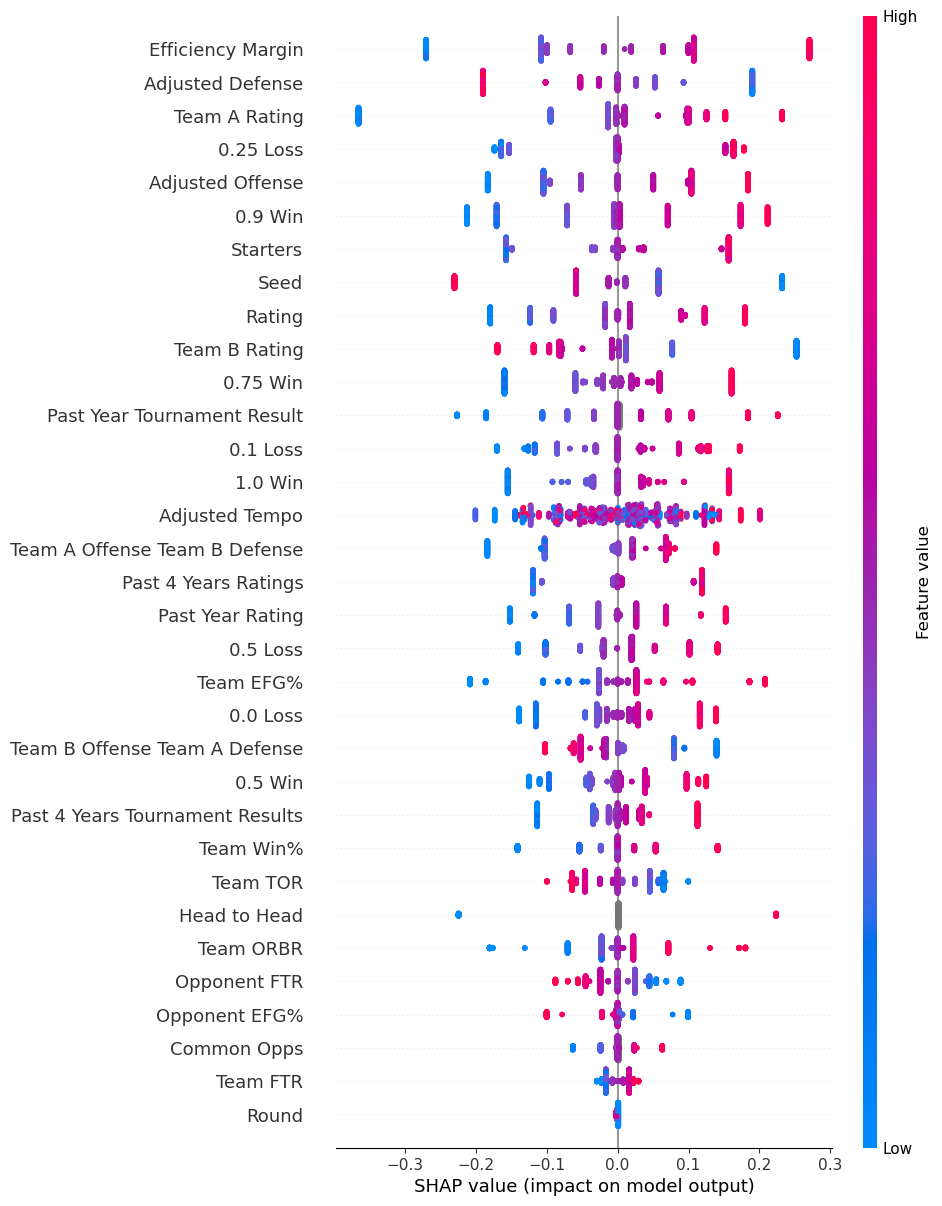

In [15]:
shap.plots.beeswarm(shap_values, max_display=None)

In [16]:
df_feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': mod.feature_importances_,
}).sort_values(['Importance'], ascending=False, ignore_index=True)

df_feature_importance

,Feature,Importance
0,Starters,0.069034
1,Head to Head,0.068548
2,Efficiency Margin,0.068515
3,0.25 Loss,0.063967
4,Team B Offense Team A Defense,0.051852
5,Adjusted Defense,0.051483
6,Rating,0.047346
7,Past 4 Years Ratings,0.044903
8,Adjusted Offense,0.043010
9,0.75 Win,0.042011


In [17]:
# import pickle

# with open('../womens_model/20240316/model.pkl', 'wb') as f:
#     pickle.dump(mod, f)

# df_mod.to_csv('../womens_model/20240316/df_mod.csv', index=False)

# 'Done'

'Done'